In [147]:
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
salad_data = pd.read_csv('/Users/gauravsharma/Documents/Forecasting/data.csv', index_col = 'date', parse_dates=True)
salad_data.head()
#index_col is to remove the default index and allocating the date column as index
#parse_dates changes the format of date although keeps the data type as object i.e. string

,salescount
date,
2016-01-02,20
2016-01-03,13
2016-01-04,32
2016-01-05,29
2016-01-06,30


In [149]:
salad_data.dtypes

salescount    int64
dtype: object

<Figure size 432x288 with 0 Axes>

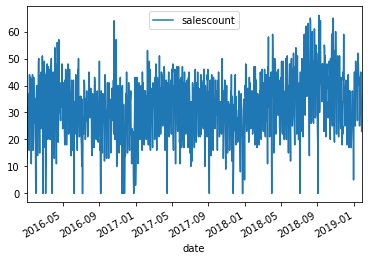

In [150]:
plt.figure()
salad_data.plot()
plt.show()

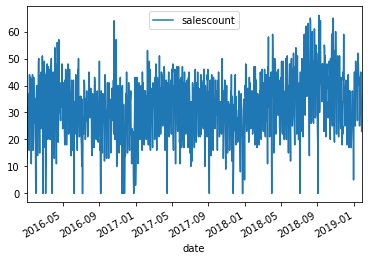

In [151]:
#show the time series on axis ax
fig, ax = plt.subplots()
salad_data.plot(ax=ax)
plt.show()

In [152]:
salad_data = pd.read_csv('/Users/gauravsharma/Documents/Forecasting/data.csv')
#no arguments in read_csv loads the dataset as it is with index column extra

In [153]:
salad_data.head()

,date,salescount
0,1/2/2016,20
1,1/3/2016,13
2,1/4/2016,32
3,1/5/2016,29
4,1/6/2016,30


In [154]:
for col in salad_data.columns:
    print(col)

date
salescount


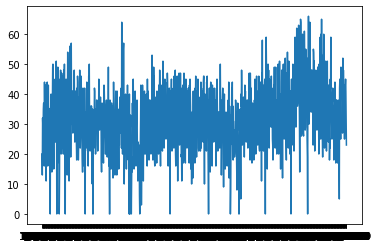

In [155]:
plt.figure()
plt.plot('date','salescount',data= salad_data)
plt.show()

In [156]:
year = salad_data.date.str.slice(-4,).astype(int).head()
year
#one method is to slice the characters from the string, but this method is very brittle and is likely to fail/break

0    2016
1    2016
2    2016
3    2016
4    2016
Name: date, dtype: int64

In [157]:
salad_data.dtypes

date          object
salescount     int64
dtype: object

In [158]:
salad_data['date'] = pd.to_datetime(salad_data.date)
#using the datetime method in pandas to covert the series to datetime 
#so that various other methods and attributes can be used directly on the data

In [159]:
salad_data.dtypes

date          datetime64[ns]
salescount             int64
dtype: object

In [160]:
#adding the required columns which might be useful for analyzing and visualizing the timeseries data
salad_data['weekday'] = salad_data.date.dt.weekday_name
salad_data['year']= salad_data.date.dt.year
salad_data['month']= salad_data.date.dt.month_name() 
#as month_name is a method instead of attribute, need to include () at the end unlike other
salad_data['weekday_num'] = salad_data.date.dt.weekday
salad_data['dayofyear']= salad_data.date.dt.dayofyear
salad_data.head()

,date,salescount,weekday,year,month,weekday_num,dayofyear
0,2016-01-02,20,Saturday,2016,January,5,2
1,2016-01-03,13,Sunday,2016,January,6,3
2,2016-01-04,32,Monday,2016,January,0,4
3,2016-01-05,29,Tuesday,2016,January,1,5
4,2016-01-06,30,Wednesday,2016,January,2,6


In [161]:
salad_data.dtypes

date           datetime64[ns]
salescount              int64
weekday                object
year                    int64
month                  object
weekday_num             int64
dayofyear               int64
dtype: object

In [169]:
salad_data['salescount'].mean()
#salad_data.salescount.mean()
#any one will work

32.82437275985663

In [172]:
salad_data.groupby(['year','month'], sort= True).mean()

salescount  weekday_num   dayofyear
year month                                         
2016 April       36.833333     3.100000  106.500000
     August      30.129032     2.806452  229.000000
     December    25.129032     3.096774  351.000000
     February    33.034483     2.896552   46.000000
     January     29.266667     3.166667   16.500000
     July        27.354839     3.193548  198.000000
     June        29.433333     2.966667  167.500000
     March       34.354839     2.903226   76.000000
     May         32.000000     2.935484  137.000000
     November    25.933333     2.900000  320.500000
     October     31.387097     3.064516  290.000000
     September   27.366667     3.033333  259.500000
2017 April       32.966667     3.166667  105.500000
     August      32.709677     2.903226  228.000000
     December    23.774194     3.193548  350.000000
     February    32.535714     3.000000   45.500000
     January     29.466667     2.833333   16.500000
     July        29.903226     3.064516  197.000000
     June        33.533333     3.033333  166.500000
     March       35.064516     3.000000   75.000000
     May         33.096774     2.806452  136.000000
     November    28.066667     2.966667  319.500000
     October     30.645161     2.935484  289.000000
     September   30.666667     3.100000  258.500000
2018 April       35.800000     3.000000  105.500000
     August      43.903226     3.000000  228.000000
     December    30.310345     3.241379  349.413793
     February    33.071429     3.000000   45.500000
     January     33.500000     2.900000   16.500000
     July        39.193548     2.935484  197.000000
     June        36.700000     3.100000  166.500000
     March       34.774194     3.096774   75.000000
     May         34.387097     2.903226  136.000000
     November    37.689655     3.034483  319.275862
     October     42.064516     2.806452  289.000000
     September   40.266667     3.166667  258.500000
2019 January     39.038462     3.192308   14.500000